In [1]:
import pandas as pd
from accre_functions import *

Initializing the data.
Now reading '../data/updated_jobs.csv'.


Reading CSV: 100%|██████████| 7395885/7395885 [00:52<00:00, 141322.18rows/s]


Completed reading '../data/updated_jobs.csv'.
Now reading '../data/servers_9204.csv'.


Reading CSV: 100%|██████████| 314709/314709 [00:01<00:00, 171598.74rows/s]


Completed reading '../data/servers_9204.csv'.


c:\Users\irela\Documents\NSS_Projects\accre-sweet-potato-casserole\notebooks\accre_functions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.jobs_filtered_by_completed['end_dt_min_start'] = self.jobs_filtered_by_completed['END_dt'].dt.floor('min')


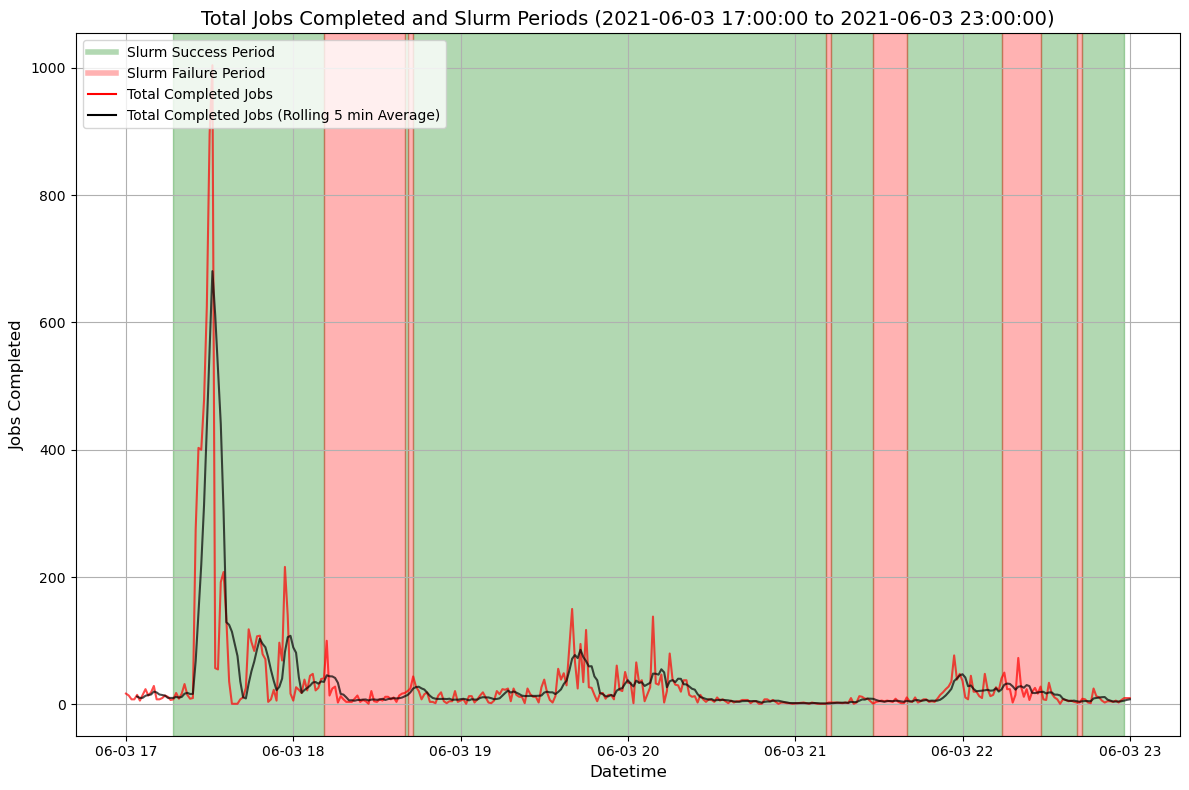

In [2]:
processor = ACCREDataProcessor()
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2021-06-03 17:00:00', end_date='2021-06-03 23:00:00', rolling=5)

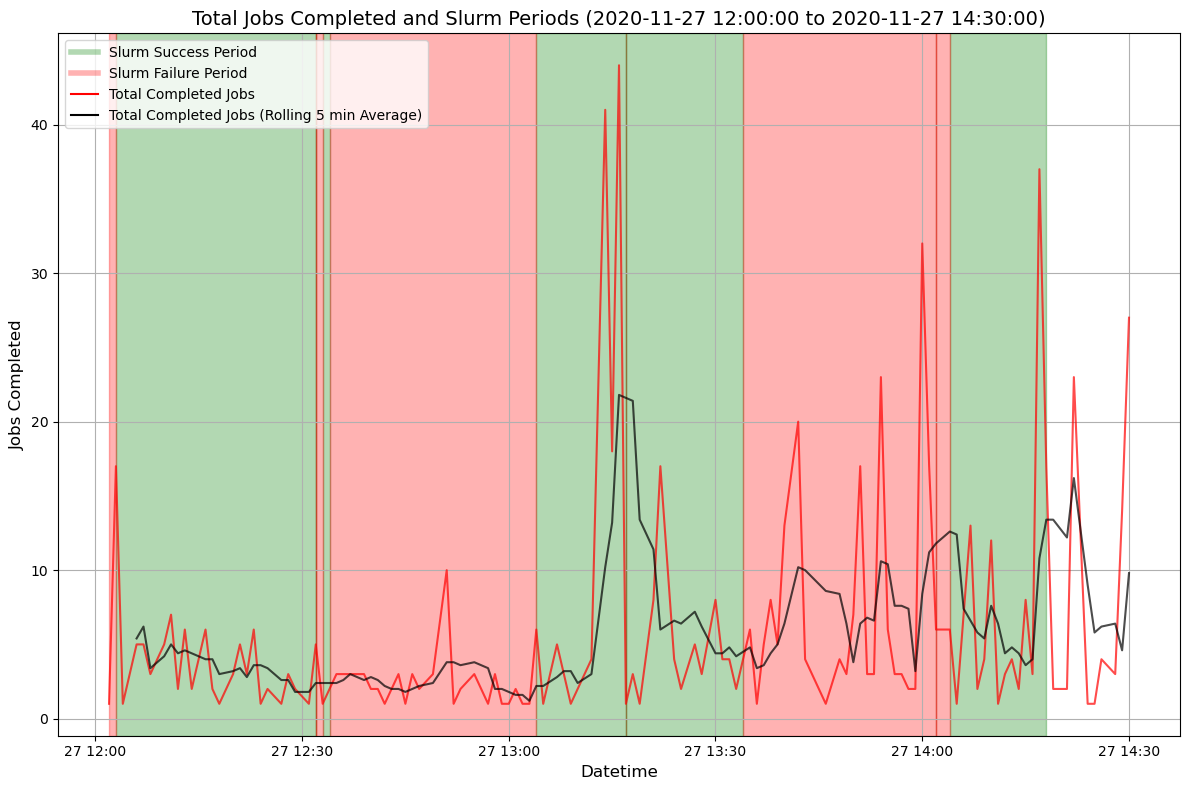

In [3]:
processor.plot_jobs_and_servers_with_slurm_periods(begin_date='2020-11-27 12:00:00', end_date='2020-11-27 14:30:00', rolling=5)

In [4]:
data_df = processor.data
data_df.head(2)

,total_completed_jobs,slurm_success
datetime,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:12:00,1.0,NaN


In [5]:
import statsmodels.formula.api as smf
import numpy as np

In [6]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [424]:
window_sizes = [str(x)+'min' for x in [1, 5, 10, 15]]#range(1, 16, 5)]
results = {}
for window in window_sizes:
    rolling_col_name = f'rolling_completed_jobs_{window}'
    data_df[rolling_col_name] = data_df['total_completed_jobs'].rolling(window, closed='left').mean()
    formula = f'slurm_success ~ total_completed_jobs + {rolling_col_name}'
    model = smf.logit(formula, data=data_df).fit()
    results[window] = model
    print(f"Summary for {window} rolling average:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        13:23:58   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [426]:
results['1min'].params

Intercept                      3.213883
total_completed_jobs          -0.006822
rolling_completed_jobs_1min    0.011799
dtype: float64

In [8]:
processor.test_range_rolling_completed_jobs()

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        12:32:11   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [9]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=101, rolling_period='1min')

0.9335660531491711

In [10]:
rolling_jobs_completed = 100
total_completed_jobs = 50
rolling_period = '2min'
rolling_formula_result = results[rolling_period].params['Intercept'] + results[rolling_period].params['total_completed_jobs']*total_completed_jobs + results[rolling_period].params['rolling_completed_jobs_'+rolling_period]*rolling_jobs_completed
prob = logistic(rolling_formula_result)
prob

0.9777995083446949

In [11]:
processor.data.head()

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0
2020-10-01 00:13:00,1.0,NaN,1.0,1.0,1.0,1.0
2020-10-01 00:17:00,2.0,NaN,NaN,NaN,NaN,1.0
2020-10-01 00:19:00,1.0,NaN,NaN,2.0,2.0,2.0


In [12]:
processor.test_range_rolling_completed_jobs(range_begin=1, range_end=6, step_size=1)

Optimization terminated successfully.
         Current function value: 0.156812
         Iterations 8
Summary for 1min rolling average:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:                44493
Model:                          Logit   Df Residuals:                    44490
Method:                           MLE   Df Model:                            2
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.005076
Time:                        12:32:12   Log-Likelihood:                -6977.1
converged:                       True   LL-Null:                       -7012.6
Covariance Type:            nonrobust   LLR p-value:                 3.475e-16
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.2139  

In [13]:
processor.calculate_rolling_probability(rolling_jobs_completed=10, total_completed_jobs=500, rolling_period='2min')

0.5828818090615814

In [14]:
#processor.test_range_rolling_completed_jobs(range_begin=150, range_end=300, step_size=10, closed='right')

In [15]:
processor.calculate_rolling_probability(rolling_jobs_completed=100, total_completed_jobs=100, rolling_period='2min')

0.968923001387792

In [16]:
data = processor.data
#data['rolling_left_180min'] = data['total_completed_jobs'].rolling('2min', closed='left').mean()
#data['rolling_right_180min'] = data['total_completed_jobs'].rolling('180min', closed='right').mean()
data.head(2)

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
datetime,,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [17]:
#leftright_logreg = smf.logit('slurm_success ~ total_completed_jobs + rolling_right_180min + (total_completed_jobs * rolling_right_180min)', data=data).fit()
#leftright_logreg.summary()

In [18]:
"""
data = processor.data
data_w = data
data_w['future_av'] = data_w.apply()

# Calculate the average of completed jobs within this range
average_completed_jobs = filtered_data['total_completed_jobs'].mean()
time_span = [str(x)+'min' for x in range(45, 60, 1)]
rolling_range_dict = {}
for period in time_span:
    rolling_col_name = f'rolling_right_{period}'
    print(rolling_col_name)
    data[rolling_col_name] = data['total_completed_jobs'].shift().rolling(period, closed='right').mean()
    function = f'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs *{rolling_col_name})'
    model = smf.logit(function, data=data).fit()
    rolling_range_dict[period] = model
    print(f"Summary for {period} rolling average:")
    print(model.summary())
"""

'\ndata = processor.data\ndata_w = data\ndata_w[\'future_av\'] = data_w.apply()\n\n# Calculate the average of completed jobs within this range\naverage_completed_jobs = filtered_data[\'total_completed_jobs\'].mean()\ntime_span = [str(x)+\'min\' for x in range(45, 60, 1)]\nrolling_range_dict = {}\nfor period in time_span:\n    rolling_col_name = f\'rolling_right_{period}\'\n    print(rolling_col_name)\n    data[rolling_col_name] = data[\'total_completed_jobs\'].shift().rolling(period, closed=\'right\').mean()\n    function = f\'slurm_success ~ total_completed_jobs + {rolling_col_name} + (total_completed_jobs *{rolling_col_name})\'\n    model = smf.logit(function, data=data).fit()\n    rolling_range_dict[period] = model\n    print(f"Summary for {period} rolling average:")\n    print(model.summary())\n'

In [19]:
my_data = data_df.reset_index()
my_data['datetime'] = my_data['datetime'].astype('datetime64[ns]')
my_data.head(2)

,datetime,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
0,2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [20]:
def compute_future_avg(row):
    start_time = row['datetime'] + pd.Timedelta(minutes=30)
    end_time = row['datetime'] + pd.Timedelta(minutes=50)
    filtered_df = my_data[my_data['datetime'].between(start_time, end_time)]
    return filtered_df['total_completed_jobs'].mean()

In [21]:
my_data.columns

Index(['datetime', 'total_completed_jobs', 'slurm_success',
       'rolling_completed_jobs_1min', 'rolling_completed_jobs_2min',
       'rolling_completed_jobs_3min', 'rolling_completed_jobs_4min',
       'rolling_completed_jobs_5min'],
      dtype='object')

In [22]:
#my_data['future_avg'] = my_data.apply(lambda row: compute_future_avg(row), axis=1)
#my_data.head()

In [23]:
ce5_read = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python',
                 )
ce5=ce5_read
ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [24]:
ce5[5].value_counts()

5
command ['/usr/bin/scontrol', 'show', 'job']                                                                          551116
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'cmspilot']                                                           59796
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'lscpilot']                                                           56818
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'uscmslocal']                                                         24164
command ['/usr/bin/squeue', '-o', '%i %T', '-u', 'cmslocal']                                                           23133
                                                                                                                       ...  
command ['/usr/bin/sacct', '-j', '26836699', '--noconvert', '-P', '--format', 'UserCPU,SystemCPU,MaxRSS,ExitCode']         1
command ['/usr/bin/sacct', '-j', '26836681', '--noconvert', '-P', '--format', 'UserCPU,SystemCPU,MaxRSS,ExitCode']         

In [25]:
ce5 = ce5[ce5[5].str.contains('sbatch')]
ce5.head()

,0,1,2,3,4,5
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
34,2020-10-16 08:32:53.021570,user 9201,retry 0,time 0.07345795631408691,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
35,2020-10-16 08:32:53.063351,user 9201,retry 0,time 0.06784367561340332,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
36,2020-10-16 08:32:53.263876,user 9201,retry 0,time 0.19620347023010254,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."


In [26]:
ce5[4].value_counts()

4
returncode 0      770044
returncode 1      134248
returncode 255      6242
Name: count, dtype: int64

In [27]:
ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)
ce5 = ce5.drop([4, 'test'], axis=1)
ce5.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_2328\1849688024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)
C:\Users\irela\AppData\Local\Temp\ipykernel_2328\1849688024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce5[['test', 'return_code']] = ce5[4].str.split(' ', n=1, expand=True)


,0,1,2,3,5,return_code
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
34,2020-10-16 08:32:53.021570,user 9201,retry 0,time 0.07345795631408691,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
35,2020-10-16 08:32:53.063351,user 9201,retry 0,time 0.06784367561340332,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
36,2020-10-16 08:32:53.263876,user 9201,retry 0,time 0.19620347023010254,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0


In [28]:
ce5.head(2)

,0,1,2,3,5,return_code
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0


In [29]:
ce5['return_code'] = ce5['return_code'].astype(int)

In [30]:
ce5.dtypes

0              object
1              object
2              object
3              object
5              object
return_code     int32
dtype: object

In [31]:
ce5['return_code'].value_counts()

return_code
0      770044
1      134248
255      6242
Name: count, dtype: int64

In [32]:
ce5 = ce5[(ce5['return_code']==1) | (ce5['return_code']==0)]
ce5.head()

,0,1,2,3,5,return_code
29,2020-10-16 08:32:25.162144,user 9201,retry 0,time 0.12207937240600586,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
30,2020-10-16 08:32:25.254135,user 9201,retry 0,time 0.12226557731628418,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
34,2020-10-16 08:32:53.021570,user 9201,retry 0,time 0.07345795631408691,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
35,2020-10-16 08:32:53.063351,user 9201,retry 0,time 0.06784367561340332,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0
36,2020-10-16 08:32:53.263876,user 9201,retry 0,time 0.19620347023010254,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr...",0


In [81]:
new_ce5 = ce5
new_ce5['time'] = new_ce5[0].astype('datetime64[ns]').dt.floor('min')
new_ce5 = new_ce5.groupby('time')['return_code'].min().reset_index(name='return_code')
new_ce5.head()

,time,return_code
0,2020-10-16 08:32:00,0
1,2020-10-16 08:33:00,0
2,2020-10-16 08:34:00,0
3,2020-10-16 08:36:00,0
4,2020-10-16 08:37:00,0


In [82]:
ce6_read = pd.read_csv('../data/slurm_wrapper_ce6.log',
                  header=None,
                  delimiter=' - ',
                  engine='python',
                 )
ce6=ce6_read
ce6.head()

,0,1,2,3,4,5
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [83]:
ce6 = ce6[ce6[5].str.contains('sbatch')]
ce6[['test', 'return_code']] = ce6[4].str.split(' ', n=1, expand=True)
ce6 = ce6.drop([4, 'test'], axis=1)
ce6['return_code'] = ce6['return_code'].astype(int)
ce6 = ce6[(ce6['return_code']==1) | (ce6['return_code']==0)]
new_ce6 = ce6
new_ce6['time'] = new_ce6[0].astype('datetime64[ns]').dt.floor('min')
new_ce6 = new_ce6.groupby('time')['return_code'].min().reset_index(name='return_code')
new_ce6.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_2328\4030417683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce6[['test', 'return_code']] = ce6[4].str.split(' ', n=1, expand=True)
C:\Users\irela\AppData\Local\Temp\ipykernel_2328\4030417683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce6[['test', 'return_code']] = ce6[4].str.split(' ', n=1, expand=True)


,time,return_code
0,2020-10-16 10:38:00,0
1,2020-10-16 10:41:00,0
2,2020-10-16 10:42:00,0
3,2020-10-16 10:43:00,0
4,2020-10-16 10:45:00,0


In [85]:
servers_df = pd.concat([new_ce5, new_ce6])
servers_df = servers_df.groupby('time')['return_code'].min().reset_index(name='return_code')
servers_df = servers_df.sort_values('time')
servers_df.head()

,time,return_code
0,2020-10-16 08:32:00,0
1,2020-10-16 08:33:00,0
2,2020-10-16 08:34:00,0
3,2020-10-16 08:36:00,0
4,2020-10-16 08:37:00,0


# percentage jump

In [33]:
data = processor.data
data.head(2)

,total_completed_jobs,slurm_success,rolling_completed_jobs_1min,rolling_completed_jobs_2min,rolling_completed_jobs_3min,rolling_completed_jobs_4min,rolling_completed_jobs_5min
datetime,,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:12:00,1.0,NaN,NaN,1.0,1.0,1.0,1.0


In [34]:
jobs_grouped = processor.jobs_grouped
jobs_grouped.head()

,end_dt_min_start,total_completed_jobs
0,2020-10-01 00:10:00,1
1,2020-10-01 00:12:00,1
2,2020-10-01 00:13:00,1
3,2020-10-01 00:17:00,2
4,2020-10-01 00:19:00,1


In [35]:
jobs_grouped = jobs_grouped.set_index('end_dt_min_start')
jobs_grouped = jobs_grouped.resample('1min').asfreq()
jobs_grouped.head(10)

,total_completed_jobs
end_dt_min_start,
2020-10-01 00:10:00,1.0
2020-10-01 00:11:00,NaN
2020-10-01 00:12:00,1.0
2020-10-01 00:13:00,1.0
2020-10-01 00:14:00,NaN
2020-10-01 00:15:00,NaN
2020-10-01 00:16:00,NaN
2020-10-01 00:17:00,2.0
2020-10-01 00:18:00,NaN


In [36]:
jobs_grouped['total_completed_jobs'] = jobs_grouped['total_completed_jobs'].fillna(0)
jobs_grouped.head()

,total_completed_jobs
end_dt_min_start,
2020-10-01 00:10:00,1.0
2020-10-01 00:11:00,0.0
2020-10-01 00:12:00,1.0
2020-10-01 00:13:00,1.0
2020-10-01 00:14:00,0.0


In [37]:
jobs_grouped['jump'] = jobs_grouped['total_completed_jobs'] - jobs_grouped['total_completed_jobs'].shift(periods=1)
jobs_grouped.head()

,total_completed_jobs,jump
end_dt_min_start,,
2020-10-01 00:10:00,1.0,NaN
2020-10-01 00:11:00,0.0,-1.0
2020-10-01 00:12:00,1.0,1.0
2020-10-01 00:13:00,1.0,0.0
2020-10-01 00:14:00,0.0,-1.0


In [38]:
jobs_grouped['jump'].value_counts(normalize=True)

jump
 0.0      0.130379
-1.0      0.096633
 1.0      0.095335
-2.0      0.072572
 2.0      0.070121
            ...   
-318.0    0.000002
 368.0    0.000002
-362.0    0.000002
 477.0    0.000002
 353.0    0.000002
Name: proportion, Length: 812, dtype: float64

In [39]:
min_floor_9204 = processor.servers_9204
min_floor_9204['datetime'] = processor.servers_9204['datetime'].dt.floor('min')
grouped_servers_9204 = (
                min_floor_9204.groupby('datetime')['slurm_success']
                .min()
                .reset_index(name='slurm_success')
                )
grouped_servers_9204.head()

,datetime,slurm_success
0,2020-10-16 08:34:00,1
1,2020-10-16 08:53:00,1
2,2020-10-16 09:04:00,1
3,2020-10-16 09:24:00,1
4,2020-10-16 09:34:00,1


In [40]:
grouped_servers_9204 = grouped_servers_9204.set_index('datetime')
grouped_servers_9204 = grouped_servers_9204.resample('1min').asfreq()
grouped_servers_9204.head(10)

,slurm_success
datetime,
2020-10-16 08:34:00,1.0
2020-10-16 08:35:00,NaN
2020-10-16 08:36:00,NaN
2020-10-16 08:37:00,NaN
2020-10-16 08:38:00,NaN
2020-10-16 08:39:00,NaN
2020-10-16 08:40:00,NaN
2020-10-16 08:41:00,NaN
2020-10-16 08:42:00,NaN


In [41]:
jobs_grouped = jobs_grouped.reset_index()
grouped_servers_9204 = grouped_servers_9204.reset_index()
grouped_servers_9204.head()

,datetime,slurm_success
0,2020-10-16 08:34:00,1.0
1,2020-10-16 08:35:00,NaN
2,2020-10-16 08:36:00,NaN
3,2020-10-16 08:37:00,NaN
4,2020-10-16 08:38:00,NaN


In [42]:
merged_df = (
                pd.merge(right=grouped_servers_9204, left=jobs_grouped, right_on='datetime', left_on='end_dt_min_start', how='outer')
                .dropna(subset='end_dt_min_start')
                .drop(columns=['datetime'])
                .rename(columns={'end_dt_min_start':'datetime'})
                .set_index('datetime')
            )
merged_df.head()

,total_completed_jobs,jump,slurm_success
datetime,,,
2020-10-01 00:10:00,1.0,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN
2020-10-01 00:12:00,1.0,1.0,NaN
2020-10-01 00:13:00,1.0,0.0,NaN
2020-10-01 00:14:00,0.0,-1.0,NaN


In [43]:
merged_df['total_completed_jobs'].describe()

count    535472.000000
mean         13.773053
std          29.847491
min           0.000000
25%           2.000000
50%           6.000000
75%          12.000000
max        1004.000000
Name: total_completed_jobs, dtype: float64

In [44]:
merged_df['jump'].describe()

count    535471.000000
mean          0.000000
std          22.474527
min        -947.000000
25%          -3.000000
50%           0.000000
75%           3.000000
max         903.000000
Name: jump, dtype: float64

In [45]:
merged_df['pctg_jump'] = merged_df['jump'] / (merged_df['total_completed_jobs'] + 1)
merged_df.head()

,total_completed_jobs,jump,slurm_success,pctg_jump
datetime,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN,-1.0
2020-10-01 00:12:00,1.0,1.0,NaN,0.5
2020-10-01 00:13:00,1.0,0.0,NaN,0.0
2020-10-01 00:14:00,0.0,-1.0,NaN,-1.0


In [46]:
merged_df['prev_min_completed_jobs'] = merged_df['total_completed_jobs'].shift(periods=1)
merged_df['prev_min_jump'] = merged_df['jump'].shift(periods=1)
merged_df.head()

,total_completed_jobs,jump,slurm_success,pctg_jump,prev_min_completed_jobs,prev_min_jump
datetime,,,,,,
2020-10-01 00:10:00,1.0,NaN,NaN,NaN,NaN,NaN
2020-10-01 00:11:00,0.0,-1.0,NaN,-1.0,1.0,NaN
2020-10-01 00:12:00,1.0,1.0,NaN,0.5,0.0,-1.0
2020-10-01 00:13:00,1.0,0.0,NaN,0.0,1.0,1.0
2020-10-01 00:14:00,0.0,-1.0,NaN,-1.0,1.0,0.0


In [47]:
merged_df['total_completed_jobs'].value_counts()

total_completed_jobs
2.0       46708
0.0       46321
1.0       45346
3.0       45182
4.0       40641
          ...  
629.0         1
1004.0        1
896.0         1
625.0         1
703.0         1
Name: count, Length: 501, dtype: int64

In [48]:
jump_logreg = smf.logit('slurm_success ~ prev_min_jump', data=merged_df).fit()
jump_logreg.params


Optimization terminated successfully.
         Current function value: 0.199970
         Iterations 7


Intercept        2.937691
prev_min_jump    0.005833
dtype: float64

In [49]:
jump_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:                52154
Model:                          Logit   Df Residuals:                    52152
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.002379
Time:                        12:32:58   Log-Likelihood:                -10429.
converged:                       True   LL-Null:                       -10454.
Covariance Type:            nonrobust   LLR p-value:                 1.754e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9377      0.020    146.352      0.000       2.898       2.977
prev_min_jump     0.0058      0.001      7.541      0.000       0.004       0.007
=================================================================================
"""

In [50]:
merged_df.corr()

,total_completed_jobs,jump,slurm_success,pctg_jump,prev_min_completed_jobs,prev_min_jump
total_completed_jobs,1.000000,0.376489,0.009858,0.070868,0.716512,0.115195
jump,0.376489,1.000000,-0.031579,0.389755,-0.376489,-0.347014
slurm_success,0.009858,-0.031579,1.000000,0.099904,0.034338,0.032533
pctg_jump,0.070868,0.389755,0.099904,1.000000,-0.222609,-0.153778
prev_min_completed_jobs,0.716512,-0.376489,0.034338,-0.222609,1.000000,0.376489
prev_min_jump,0.115195,-0.347014,0.032533,-0.153778,0.376489,1.000000


In [51]:
jump_logreg.aic

20862.50258936229

# number of running jobs

In [52]:
jobs = processor.jobs
jobs.head()

,Unnamed: 0,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,BEGIN_dt,END_dt
0,0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0,2021-07-31 22:15:00,NaT
1,1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,2021-08-06 11:36:09,2021-09-05 11:36:32
2,2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,2021-08-06 19:04:39,2021-09-05 19:04:53
3,3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,2021-08-09 16:52:51,2021-09-07 20:52:55
4,4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,2021-08-17 07:45:07,2021-09-10 16:45:24


In [53]:
begin_df = pd.DataFrame()
begin_df['time'] = jobs['BEGIN_dt'].sort_values()
begin_df['ones'] = 1
begin_df['begin_cumulative_sum'] = begin_df['ones'].cumsum()
begin_df.head(10)

,time,ones,begin_cumulative_sum
6640555,2020-10-01 00:03:08,1,1
6640560,2020-10-01 00:03:08,1,2
6640559,2020-10-01 00:03:08,1,3
6640558,2020-10-01 00:03:08,1,4
6640557,2020-10-01 00:03:08,1,5
6640556,2020-10-01 00:03:08,1,6
6640566,2020-10-01 00:03:08,1,7
6640554,2020-10-01 00:03:08,1,8
6640565,2020-10-01 00:03:08,1,9
6640586,2020-10-01 00:05:55,1,10


In [54]:
end_df = pd.DataFrame()
end_df['time'] = jobs['END_dt'].sort_values()
end_df['ones'] = 1
end_df['end_cumulative_sum'] = end_df['ones'].cumsum()
end_df.head(10)

,time,ones,end_cumulative_sum
6640577,2020-10-01 00:10:15,1,1
6640635,2020-10-01 00:12:58,1,2
6640627,2020-10-01 00:13:31,1,3
6640651,2020-10-01 00:17:23,1,4
6640654,2020-10-01 00:17:53,1,5
6640643,2020-10-01 00:19:45,1,6
6640555,2020-10-01 00:23:13,1,7
6640557,2020-10-01 00:23:13,1,8
6640558,2020-10-01 00:23:14,1,9
6640559,2020-10-01 00:23:14,1,10


In [55]:
start_end_df = pd.concat([begin_df, end_df])
start_end_df = start_end_df.sort_values(['time', 'begin_cumulative_sum', 'end_cumulative_sum'])
start_end_df.head(15)

,time,ones,begin_cumulative_sum,end_cumulative_sum
6640555,2020-10-01 00:03:08,1,1.0,NaN
6640560,2020-10-01 00:03:08,1,2.0,NaN
6640559,2020-10-01 00:03:08,1,3.0,NaN
6640558,2020-10-01 00:03:08,1,4.0,NaN
6640557,2020-10-01 00:03:08,1,5.0,NaN
6640556,2020-10-01 00:03:08,1,6.0,NaN
6640566,2020-10-01 00:03:08,1,7.0,NaN
6640554,2020-10-01 00:03:08,1,8.0,NaN
6640565,2020-10-01 00:03:08,1,9.0,NaN
6640586,2020-10-01 00:05:55,1,10.0,NaN


In [56]:
start_end_df['end_cumulative_sum'] = start_end_df['end_cumulative_sum'].ffill()
start_end_df['end_cumulative_sum'] = start_end_df['end_cumulative_sum'].fillna(0)
start_end_df['begin_cumulative_sum'] = start_end_df['begin_cumulative_sum'].ffill()
start_end_df['begin_cumulative_sum'] = start_end_df['begin_cumulative_sum'].fillna(0)
start_end_df.head(2)

,time,ones,begin_cumulative_sum,end_cumulative_sum
6640555,2020-10-01 00:03:08,1,1.0,0.0
6640560,2020-10-01 00:03:08,1,2.0,0.0


In [57]:
start_end_df['currently_running'] = start_end_df['begin_cumulative_sum'] - start_end_df['end_cumulative_sum']
start_end_df.head(10)

,time,ones,begin_cumulative_sum,end_cumulative_sum,currently_running
6640555,2020-10-01 00:03:08,1,1.0,0.0,1.0
6640560,2020-10-01 00:03:08,1,2.0,0.0,2.0
6640559,2020-10-01 00:03:08,1,3.0,0.0,3.0
6640558,2020-10-01 00:03:08,1,4.0,0.0,4.0
6640557,2020-10-01 00:03:08,1,5.0,0.0,5.0
6640556,2020-10-01 00:03:08,1,6.0,0.0,6.0
6640566,2020-10-01 00:03:08,1,7.0,0.0,7.0
6640554,2020-10-01 00:03:08,1,8.0,0.0,8.0
6640565,2020-10-01 00:03:08,1,9.0,0.0,9.0
6640586,2020-10-01 00:05:55,1,10.0,0.0,10.0


In [58]:
start_end_df['currently_running'].describe()

count    1.479177e+07
mean     3.492419e+03
std      8.835713e+02
min      0.000000e+00
25%      2.971000e+03
50%      3.509000e+03
75%      4.076000e+03
max      6.390000e+03
Name: currently_running, dtype: float64

<Axes: xlabel='time'>

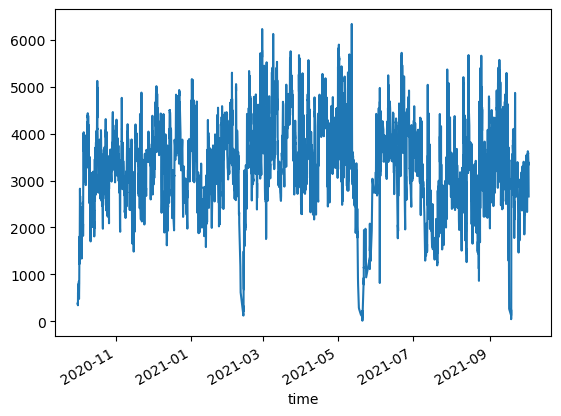

In [59]:
start_end_df.sample(10000).set_index('time').sort_index()['currently_running'].plot()

In [125]:
num_min_floor = start_end_df
num_min_floor['time'] = start_end_df['time'].dt.floor('min')
num_jobs_df = num_min_floor.groupby('time')['currently_running'].max().reset_index(name='num_jobs')
num_jobs_df.head()

,time,num_jobs
0,2020-10-01 00:03:00,9.0
1,2020-10-01 00:05:00,25.0
2,2020-10-01 00:10:00,25.0
3,2020-10-01 00:11:00,34.0
4,2020-10-01 00:12:00,33.0


In [126]:
num_jobs_df['num_jobs'].describe()

count    502752.000000
mean       3259.350085
std         951.644914
min           0.000000
25%        2695.000000
50%        3294.000000
75%        3888.000000
max        6390.000000
Name: num_jobs, dtype: float64

In [127]:
num_jobs_df = num_jobs_df.set_index('time')
num_jobs_df = num_jobs_df.resample('1min').asfreq().ffill()
num_jobs_df.head()

,num_jobs
time,
2020-10-01 00:03:00,9.0
2020-10-01 00:04:00,9.0
2020-10-01 00:05:00,25.0
2020-10-01 00:06:00,25.0
2020-10-01 00:07:00,25.0


<Axes: xlabel='time'>

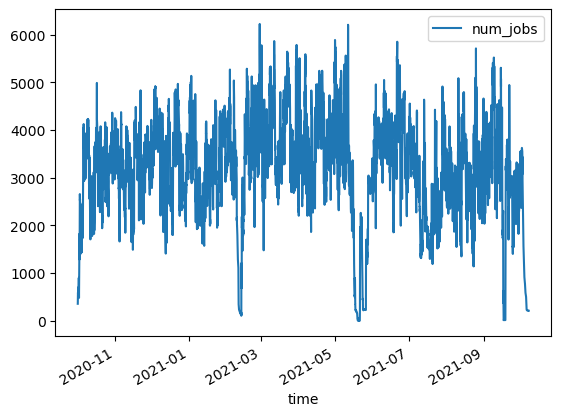

In [128]:
num_jobs_df.sample(10000).sort_index().plot()

In [358]:
low_jobs = num_jobs_df[num_jobs_df['num_jobs']<1500]
low_jobs.head()

,time,num_jobs
0,2020-10-01 00:03:00,9.0
1,2020-10-01 00:04:00,9.0
2,2020-10-01 00:05:00,25.0
3,2020-10-01 00:06:00,25.0
4,2020-10-01 00:07:00,25.0


In [359]:
low_dates = low_jobs.time.dt.date.value_counts().index.to_list()
type(low_dates[0])

datetime.date

In [129]:
to_csv_data = data[['total_completed_jobs', 'slurm_success']]
to_csv_data = to_csv_data.reset_index().rename(columns={'datetime':'time'})
to_csv_data.head()

,time,total_completed_jobs,slurm_success
0,2020-10-01 00:10:00,1.0,NaN
1,2020-10-01 00:12:00,1.0,NaN
2,2020-10-01 00:13:00,1.0,NaN
3,2020-10-01 00:17:00,2.0,NaN
4,2020-10-01 00:19:00,1.0,NaN


In [130]:
num_jobs_df = num_jobs_df.reset_index()
to_csv_data = pd.merge(left=to_csv_data, right=num_jobs_df, how='outer')
to_csv_data

,time,total_completed_jobs,slurm_success,num_jobs
0,2020-10-01 00:03:00,NaN,NaN,9.0
1,2020-10-01 00:04:00,NaN,NaN,9.0
2,2020-10-01 00:05:00,NaN,NaN,25.0
3,2020-10-01 00:06:00,NaN,NaN,25.0
4,2020-10-01 00:07:00,NaN,NaN,25.0
...,...,...,...,...
535474,2021-10-07 20:37:00,NaN,NaN,208.0
535475,2021-10-07 20:38:00,NaN,NaN,208.0
535476,2021-10-07 20:39:00,NaN,NaN,209.0
535477,2021-10-07 20:40:00,NaN,NaN,209.0


In [133]:
to_csv_data = pd.merge(to_csv_data, servers_df, how='outer')#.drop(columns=['index'])
to_csv_data.head()

,time,total_completed_jobs,slurm_success,num_jobs,return_code
0,2020-10-01 00:03:00,NaN,NaN,9.0,NaN
1,2020-10-01 00:04:00,NaN,NaN,9.0,NaN
2,2020-10-01 00:05:00,NaN,NaN,25.0,NaN
3,2020-10-01 00:06:00,NaN,NaN,25.0,NaN
4,2020-10-01 00:07:00,NaN,NaN,25.0,NaN


In [134]:
import numpy as np

In [135]:
to_csv_data['new_slurm_success'] = np.where(to_csv_data['return_code'].isna(), np.nan, (to_csv_data['return_code'] == 0).astype(int))
to_csv_data

,time,total_completed_jobs,slurm_success,num_jobs,return_code,new_slurm_success
0,2020-10-01 00:03:00,NaN,NaN,9.0,NaN,NaN
1,2020-10-01 00:04:00,NaN,NaN,9.0,NaN,NaN
2,2020-10-01 00:05:00,NaN,NaN,25.0,NaN,NaN
3,2020-10-01 00:06:00,NaN,NaN,25.0,NaN,NaN
4,2020-10-01 00:07:00,NaN,NaN,25.0,NaN,NaN
...,...,...,...,...,...,...
535492,2021-10-07 21:44:00,NaN,NaN,NaN,0.0,1.0
535493,2021-10-07 21:53:00,NaN,NaN,NaN,0.0,1.0
535494,2021-10-07 21:54:00,NaN,NaN,NaN,0.0,1.0
535495,2021-10-07 21:55:00,NaN,NaN,NaN,0.0,1.0


In [137]:
to_csv_data['eval_success'] = np.where(to_csv_data['slurm_success'].isna() | to_csv_data['new_slurm_success'].isna(), np.nan, to_csv_data['slurm_success'] == to_csv_data['new_slurm_success'])
to_csv_data.head()

,time,total_completed_jobs,slurm_success,num_jobs,return_code,new_slurm_success,eval_success
0,2020-10-01 00:03:00,NaN,NaN,9.0,NaN,NaN,NaN
1,2020-10-01 00:04:00,NaN,NaN,9.0,NaN,NaN,NaN
2,2020-10-01 00:05:00,NaN,NaN,25.0,NaN,NaN,NaN
3,2020-10-01 00:06:00,NaN,NaN,25.0,NaN,NaN,NaN
4,2020-10-01 00:07:00,NaN,NaN,25.0,NaN,NaN,NaN


In [138]:
to_csv_data['eval_success'].value_counts()

eval_success
1.0    46018
0.0     1199
Name: count, dtype: int64

In [139]:
to_csv_data['eval_success'].sum()

46018.0

In [140]:
inspect = to_csv_data[to_csv_data['eval_success']==0]
inspect

,time,total_completed_jobs,slurm_success,num_jobs,return_code,new_slurm_success,eval_success
24853,2020-10-18 06:16:00,1.0,0.0,3086.0,0.0,1.0,0.0
24875,2020-10-18 06:38:00,1.0,0.0,3066.0,0.0,1.0,0.0
24890,2020-10-18 06:53:00,3.0,0.0,3069.0,0.0,1.0,0.0
24944,2020-10-18 07:47:00,1.0,0.0,3068.0,0.0,1.0,0.0
24950,2020-10-18 07:53:00,4.0,0.0,3060.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
515741,2021-09-24 03:44:00,3.0,0.0,2611.0,0.0,1.0,0.0
515770,2021-09-24 04:13:00,4.0,0.0,2577.0,0.0,1.0,0.0
516310,2021-09-24 13:13:00,4.0,0.0,1518.0,0.0,1.0,0.0
516326,2021-09-24 13:29:00,2.0,0.0,1570.0,0.0,1.0,0.0


In [142]:
to_csv_data['slurm_success'] = to_csv_data['new_slurm_success']
to_csv_data = to_csv_data.drop(columns=['new_slurm_success', 'eval_success', 'return_code']) 
to_csv_data.head()

,time,total_completed_jobs,slurm_success,num_jobs
0,2020-10-01 00:03:00,NaN,NaN,9.0
1,2020-10-01 00:04:00,NaN,NaN,9.0
2,2020-10-01 00:05:00,NaN,NaN,25.0
3,2020-10-01 00:06:00,NaN,NaN,25.0
4,2020-10-01 00:07:00,NaN,NaN,25.0


In [144]:
to_csv_data.to_csv('../data/running_jobs.csv')

In [157]:
run_jobs = pd.read_csv('../data/running_jobs.csv').drop(columns=['Unnamed: 0'])
run_jobs.head()

,time,total_completed_jobs,slurm_success,num_jobs
0,2020-10-01 00:03:00,NaN,NaN,9.0
1,2020-10-01 00:04:00,NaN,NaN,9.0
2,2020-10-01 00:05:00,NaN,NaN,25.0
3,2020-10-01 00:06:00,NaN,NaN,25.0
4,2020-10-01 00:07:00,NaN,NaN,25.0


In [159]:
run_jobs['jump_completed_jobs'] = run_jobs['total_completed_jobs'] - run_jobs['total_completed_jobs'].shift(periods=1)
run_jobs['jump_num_running_jobs'] = run_jobs['num_jobs'] - run_jobs['num_jobs'].shift(periods=1)
run_jobs[100000:].head()

,time,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs
100000,2020-12-09 10:43:00,NaN,1.0,3837.0,NaN,0.0
100001,2020-12-09 10:44:00,NaN,0.0,3837.0,NaN,0.0
100002,2020-12-09 10:45:00,2.0,1.0,3836.0,NaN,-1.0
100003,2020-12-09 10:46:00,7.0,1.0,3865.0,5.0,29.0
100004,2020-12-09 10:47:00,3.0,1.0,3858.0,-4.0,-7.0


In [216]:
run_jobs['prev_min_completed_jobs'] = run_jobs['total_completed_jobs'].shift(periods=1)
run_jobs['next_min_completed_jobs'] = run_jobs['total_completed_jobs'].shift(periods=-1)
run_jobs['prev_min_num_jobs'] = run_jobs['num_jobs'].shift(periods=1)
run_jobs['next_min_num_jobs'] = run_jobs['num_jobs'].shift(periods=-1)
run_jobs[100000:].head()

,time,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs,prev_min_completed_jobs,next_min_completed_jobs,prev_min_num_jobs,next_min_num_jobs
100000,2020-12-09 10:43:00,NaN,1.0,3837.0,NaN,0.0,NaN,NaN,3837.0,3837.0
100001,2020-12-09 10:44:00,NaN,0.0,3837.0,NaN,0.0,NaN,2.0,3837.0,3836.0
100002,2020-12-09 10:45:00,2.0,1.0,3836.0,NaN,-1.0,NaN,7.0,3837.0,3865.0
100003,2020-12-09 10:46:00,7.0,1.0,3865.0,5.0,29.0,2.0,3.0,3836.0,3858.0
100004,2020-12-09 10:47:00,3.0,1.0,3858.0,-4.0,-7.0,7.0,NaN,3865.0,3858.0


In [374]:
running_jobs_logreg = smf.logit('slurm_success ~ total_completed_jobs + jump_completed_jobs', data=run_jobs).fit()
running_jobs_logreg.params

Optimization terminated successfully.
         Current function value: 0.089699
         Iterations 8


Intercept               4.095027
total_completed_jobs   -0.005081
jump_completed_jobs     0.002866
dtype: float64

In [375]:
running_jobs_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214161
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.003771
Time:                        12:03:46   Log-Likelihood:                -19210.
converged:                       True   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 2.649e-32
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0950      0.018    224.722      0.000       4.059       4.131
total_completed_jobs    -0.0051      0.000    -13.586      0.000      -0.006      -0.004
jump_completed_jobs      0.0029      0.001      5.599      0.000       0.002       0.004
========================================================================================
"""

In [253]:
running_jobs_logreg.aic

59859.24114755931

In [222]:
corr_df = run_jobs.set_index('time').corr()
corr_df

,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs,prev_min_completed_jobs,next_min_completed_jobs,prev_min_num_jobs,next_min_num_jobs
total_completed_jobs,1.000000,-0.024458,0.131197,0.363751,-0.129422,0.721893,0.721893,0.135389,0.121328
slurm_success,-0.024458,1.000000,-0.044979,0.002112,0.006300,-0.016792,-0.059626,-0.045169,-0.044730
num_jobs,0.131197,-0.044979,1.000000,0.009967,0.013590,0.121328,0.135389,0.999629,0.999629
jump_completed_jobs,0.363751,0.002112,0.009967,1.000000,0.238285,-0.382010,0.117209,0.001838,0.001092
jump_num_running_jobs,-0.129422,0.006300,0.013590,0.238285,1.000000,-0.306834,0.005181,-0.013663,0.022589
prev_min_completed_jobs,0.721893,-0.016792,0.121328,-0.382010,-0.306834,1.000000,0.633313,0.131197,0.117944
next_min_completed_jobs,0.721893,-0.059626,0.135389,0.117209,0.005181,0.633313,1.000000,0.135214,0.131197
prev_min_num_jobs,0.135389,-0.045169,0.999629,0.001838,-0.013663,0.131197,0.135214,1.000000,0.999012
next_min_num_jobs,0.121328,-0.044730,0.999629,0.001092,0.022589,0.117944,0.131197,0.999012,1.000000


In [218]:
columns = []
for i in run_jobs.drop(columns=['time', 'slurm_success']).columns:
    columns.append(i)
print(columns)


['total_completed_jobs', 'num_jobs', 'jump_completed_jobs', 'jump_num_running_jobs', 'prev_min_completed_jobs', 'next_min_completed_jobs', 'prev_min_num_jobs', 'next_min_num_jobs']


In [227]:
from itertools import combinations

In [230]:
high_corr = [(corr_combo[0], corr_combo[1]) for corr_combo in combinations(columns, 2) if corr_df[corr_combo[0]][corr_combo[1]] > .5 ]
print(high_corr)

[('total_completed_jobs', 'prev_min_completed_jobs'), ('total_completed_jobs', 'next_min_completed_jobs'), ('num_jobs', 'prev_min_num_jobs'), ('num_jobs', 'next_min_num_jobs'), ('prev_min_completed_jobs', 'next_min_completed_jobs'), ('prev_min_num_jobs', 'next_min_num_jobs')]


In [262]:
logit_models = {}
models_aic = {}
top_models = {}
def combo_pred_to_best_model(n=3):
    max_aic = 0
    for i in range(1, n+1):
        for combo in combinations(columns, i):
            combo = list(combo)
            # Implement some kind of check for highly correlated variables here?
            formula_params = ' + '.join(combo)
            formula = f'slurm_success ~ ' + formula_params
            model = smf.logit(formula, data=run_jobs).fit()
            logit_models[formula_params] = model
            print(f'Now showing summary for {formula_params}:')
            print(model.summary())
            print(f'{formula_params} AIC = {model.aic}')
            models_aic[formula_params] = model.aic
            if model.aic > max_aic:
                max_aic = model.aic
                max_aic_params = formula_params
            if model.aic < 40000:
                top_models[model.aic] = formula_params
    print(top_models)
    print(f'Max AIC of {max_aic} occured for model params {max_aic_params}')

combo_pred_to_best_model(5)

Optimization terminated successfully.
         Current function value: 0.094866
         Iterations 8
Now showing summary for total_completed_jobs:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224976
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.002373
Time:                        09:45:37   Log-Likelihood:                -21343.
converged:                       True   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                 7.063e-24
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9989      0.017

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214160
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.003771
Time:                        09:47:23   Log-Likelihood:                -19210.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 2.566e-31
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.0950      0.018    224.722      0.000       4.059       4.131
total_completed_jobs       -0.0030        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               241022
Model:                          Logit   Df Residuals:                   241018
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.008650
Time:                        09:48:14   Log-Likelihood:                -29674.
converged:                      False   LL-Null:                       -29932.
Covariance Type:            nonrobust   LLR p-value:                6.511e-112
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6464      0.051     90.834      0.000       4.546       4.747
num_jobs                 -0.0002        nan        nan        nan         nan         nan
jump_num

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214159
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004081
Time:                        09:49:28   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 5.351e-33
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3227      0.069     62.886      0.000       4.188       4.457
total_completed_jobs       -0.0020   8544.967  -2.31e-07      1.000   -1.67e+04    1.67e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224973
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.003714
Time:                        09:49:42   Log-Likelihood:                -21314.
converged:                      False   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                 2.482e-33
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.4439      0.064     69.600      0.000       4.319       4.569
total_completed_jobs     -0.0033      0.000     -9.362      0.000      -0.004      -0.003
num_jobs

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214159
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.003783
Time:                        09:50:01   Log-Likelihood:                -19210.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 1.533e-30
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.0969      0.018    222.402      0.000       4.061       4.133
total_completed_jobs       -0.0024   5.12e+04  -4.64e-08      1.000      -1e+05       1e+05


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206030
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01310
Time:                        09:50:11   Log-Likelihood:                -17853.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                2.744e-101
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1702      0.019    216.299      0.000       4.132       4.208
total_completed_jobs        0.0017        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214159
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004076
Time:                        09:50:15   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 5.790e-33
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3211      0.069     62.875      0.000       4.186       4.456
total_completed_jobs       -0.0027   1.81e+04   -1.5e-07      1.000   -3.55e+04    3.55e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214159
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004078
Time:                        09:50:18   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 5.596e-33
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3218      0.069     62.878      0.000       4.187       4.456
total_completed_jobs       -0.0026        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214159
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:               0.0009121
Time:                        09:50:56   Log-Likelihood:                -19265.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 4.274e-07
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.3204      0.069     62.888      0.000       4.186       4.455
num_jobs                  0.0019        nan        nan        nan         nan         nan
jump_com

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224384
Model:                          Logit   Df Residuals:                   224379
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.006157
Time:                        09:51:16   Log-Likelihood:                -25755.
converged:                      False   LL-Null:                       -25914.
Covariance Type:            nonrobust   LLR p-value:                 8.080e-68
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6153      0.058     79.283      0.000       4.501       4.729
num_jobs                    0.0131        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               225129
Model:                          Logit   Df Residuals:                   225124
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01393
Time:                        09:51:22   Log-Likelihood:                -26660.
converged:                      False   LL-Null:                       -27037.
Covariance Type:            nonrobust   LLR p-value:                1.032e-161
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.5799      0.057     80.890      0.000       4.469       4.691
num_jobs                   -0.0092    125.249  -7.34e-05      1.000    -245.493     245.474


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               241022
Model:                          Logit   Df Residuals:                   241017
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.008756
Time:                        09:51:28   Log-Likelihood:                -29670.
converged:                      False   LL-Null:                       -29932.
Covariance Type:            nonrobust   LLR p-value:                3.980e-112
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6425      0.051     90.747      0.000       4.542       4.743
num_jobs                 -0.0001        nan        nan        nan         nan         nan
jump_num

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:52:08   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3221      0.069     62.870      0.000       4.187       4.457
total_completed_jobs       -0.0019   1.59e+04  -1.23e-07      1.000   -3.11e+04    3.11e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:52:13   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.3221      0.069     62.870      0.000       4.187       4.457
total_completed_jobs     -0.0050      0.000    -12.264      0.000      -0.006      -0.004
num_jobs

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01314
Time:                        09:52:19   Log-Likelihood:                -17852.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.632e-100
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2503      0.072     59.142      0.000       4.109       4.391
total_completed_jobs        0.0021        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:52:23   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3221      0.069     62.870      0.000       4.187       4.457
total_completed_jobs       -0.0020   1.08e+04  -1.89e-07      1.000   -2.11e+04    2.11e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004082
Time:                        09:52:27   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.470e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3223      0.069     62.872      0.000       4.188       4.457
total_completed_jobs       -0.0023   1.81e+04  -1.25e-07      1.000   -3.55e+04    3.55e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:52:39   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3221      0.069     62.870      0.000       4.187       4.457
total_completed_jobs       -0.0021      0.001     -3.819      0.000      -0.003      -0.001


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214517
Model:                          Logit   Df Residuals:                   214511
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01224
Time:                        09:52:45   Log-Likelihood:                -19694.
converged:                      False   LL-Null:                       -19938.
Covariance Type:            nonrobust   LLR p-value:                3.124e-103
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3402      0.068     64.215      0.000       4.208       4.473
total_completed_jobs        0.0040      0.001      6.539      0.000       0.003       0.005


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224972
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.003725
Time:                        09:52:50   Log-Likelihood:                -21314.
converged:                      False   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                 1.330e-32
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.4452      0.064     69.582      0.000       4.320       4.570
total_completed_jobs     -0.0034      0.000     -8.902      0.000      -0.004      -0.003
num_jobs

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01359
Time:                        09:53:02   Log-Likelihood:                -17844.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                4.597e-104
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1647      0.019    215.743      0.000       4.127       4.203
total_completed_jobs        0.0027   2.09e+04    1.3e-07      1.000   -4.09e+04    4.09e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:53:06   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3221      0.069     62.870      0.000       4.187       4.457
total_completed_jobs       -0.0019   2.56e+04  -7.58e-08      1.000   -5.02e+04    5.02e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004083
Time:                        09:53:10   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.404e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3208      0.069     62.835      0.000       4.186       4.456
total_completed_jobs       -0.0024        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01315
Time:                        09:53:20   Log-Likelihood:                -17852.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.328e-100
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2618      0.072     59.310      0.000       4.121       4.403
total_completed_jobs        0.0021   1.85e+04   1.14e-07      1.000   -3.62e+04    3.62e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01314
Time:                        09:53:24   Log-Likelihood:                -17852.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.685e-100
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2484      0.072     59.089      0.000       4.107       4.389
total_completed_jobs        0.0023   1.18e+04    1.9e-07      1.000   -2.32e+04    2.32e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004078
Time:                        09:53:28   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.755e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3217      0.069     62.847      0.000       4.187       4.456
total_completed_jobs       -0.0021   1.68e+04  -1.27e-07      1.000    -3.3e+04     3.3e+04


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004087
Time:                        09:53:44   Log-Likelihood:                -19204.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.179e-32
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.3221      0.069     62.870      0.000       4.187       4.457
num_jobs                   -0.0095        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01265
Time:                        09:53:49   Log-Likelihood:                -17861.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                 1.044e-96
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2548      0.072     59.200      0.000       4.114       4.396
num_jobs                   -0.0024        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214158
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.001060
Time:                        09:53:54   Log-Likelihood:                -19263.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 9.958e-08
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.3162      0.069     62.823      0.000       4.182       4.451
num_jobs                 -0.0308        nan        nan        nan         nan         nan
jump_com

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               213987
Model:                          Logit   Df Residuals:                   213981
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01534
Time:                        09:54:05   Log-Likelihood:                -23470.
converged:                      False   LL-Null:                       -23835.
Covariance Type:            nonrobust   LLR p-value:                8.842e-156
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.4892      0.062     72.669      0.000       4.368       4.610
num_jobs                   -0.0072        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224384
Model:                          Logit   Df Residuals:                   224378
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.006229
Time:                        09:54:11   Log-Likelihood:                -25753.
converged:                      False   LL-Null:                       -25914.
Covariance Type:            nonrobust   LLR p-value:                 1.215e-67
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6119      0.058     79.204      0.000       4.498       4.726
num_jobs                    0.0022        nan        nan        nan         nan         nan


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               225129
Model:                          Logit   Df Residuals:                   225123
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01397
Time:                        09:54:16   Log-Likelihood:                -26659.
converged:                      False   LL-Null:                       -27037.
Covariance Type:            nonrobust   LLR p-value:                5.675e-161
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.5827      0.057     80.875      0.000       4.472       4.694
num_jobs                    5.7947        nan        nan        nan         nan         nan


In [265]:
new_top_models = {val:key for key, val in top_models.items()}
pd.Series(new_top_models).sort_values()[:10]

jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs                           35697.343056
total_completed_jobs + jump_completed_jobs + jump_num_running_jobs + next_min_completed_jobs                              35697.343056
total_completed_jobs + jump_completed_jobs + jump_num_running_jobs + next_min_completed_jobs + next_min_num_jobs          35697.745475
jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs + next_min_num_jobs       35697.745475
total_completed_jobs + num_jobs + jump_completed_jobs + next_min_completed_jobs + prev_min_num_jobs                       35697.821409
jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs + prev_min_num_jobs       35697.821409
num_jobs + jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs                35697.821409
total_completed_jobs + jump_completed_jobs + jump_num_r

In [266]:
models_aic['jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs']

35697.34305613092

In [419]:
new_model = smf.logit('slurm_success ~ jump_completed_jobs + prev_min_completed_jobs + next_min_completed_jobs + prev_min_num_jobs + next_min_num_jobs', data=run_jobs).fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.086623
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206029
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01339
Time:                        12:34:19   Log-Likelihood:                -17847.
converged:                       True   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.718e-102
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.2506      0.072     59.100      0.000       4.110       4.392
jump_completed_jobs         0.0040      0.001      5.564      0.000       0.003       0.005
prev_min_completed_jobs     0.0038      0.001      5.344      0.000       0.002       0.005
next_min_completed_jobs    -0.0095      0.000    -19.308      0.000      -0.011      -0.009
prev_min_num_jobs          -0.0010      0.000     -2.991      0.003      -0.002      -0.000
next_min_num_jobs           0.0010      0.000      2.913      0.004       0.000       0.002
===========================================================================================
"""

In [420]:
new_model.aic

35706.62997300173

In [270]:
other_model = smf.logit('slurm_success ~ jump_completed_jobs + jump_num_running_jobs + prev_min_completed_jobs + next_min_completed_jobs', data=run_jobs).fit()
other_model.summary()

Optimization terminated successfully.
         Current function value: 0.086605
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206030
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01359
Time:                        10:05:23   Log-Likelihood:                -17844.
converged:                       True   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                3.889e-105
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.1647      0.019    215.743      0.000       4.127       4.203
jump_completed_jobs         0.0035      0.001      5.181      0.000       0.002       0.005
jump_num_running_jobs       0.0023      0.001      4.125      0.000       0.001       0.003
prev_min_completed_jobs     0.0040      0.001      5.752      0.000       0.003       0.005
next_min_completed_jobs    -0.0099      0.001    -19.528      0.000      -0.011      -0.009
===========================================================================================
"""

In [312]:
run_jobs['time'] = run_jobs['time'].astype('datetime64[ns]')

In [334]:
run_jobs['num_jobs'].describe()

count    535479.000000
mean       3159.981811
std        1066.372847
min           0.000000
25%        2610.000000
50%        3245.000000
75%        3861.000000
max        6390.000000
Name: num_jobs, dtype: float64

In [348]:
run_jobs.head()

,time,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs,prev_min_completed_jobs,next_min_completed_jobs,prev_min_num_jobs,next_min_num_jobs
0,2020-10-01 00:03:00,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,9.0
1,2020-10-01 00:04:00,NaN,NaN,9.0,NaN,0.0,NaN,NaN,9.0,25.0
2,2020-10-01 00:05:00,NaN,NaN,25.0,NaN,16.0,NaN,NaN,9.0,25.0
3,2020-10-01 00:06:00,NaN,NaN,25.0,NaN,0.0,NaN,NaN,25.0,25.0
4,2020-10-01 00:07:00,NaN,NaN,25.0,NaN,0.0,NaN,NaN,25.0,25.0


In [360]:
#(~run_jobs['time'].between('2021-10-01', '2021-10-31')) & (~run_jobs['time'].between('2021-05-01', '2021-05-31'))
run_jobs_without_low_dates = run_jobs[~run_jobs['time'].dt.date.isin(low_dates)]
run_jobs_without_low_dates

,time,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs,prev_min_completed_jobs,next_min_completed_jobs,prev_min_num_jobs,next_min_num_jobs
5757,2020-10-05 00:00:00,5.0,NaN,1728.0,-7.0,-10.0,12.0,16.0,1738.0,1723.0
5758,2020-10-05 00:01:00,16.0,NaN,1723.0,11.0,-5.0,5.0,20.0,1728.0,1709.0
5759,2020-10-05 00:02:00,20.0,NaN,1709.0,4.0,-14.0,16.0,4.0,1723.0,1732.0
5760,2020-10-05 00:03:00,4.0,NaN,1732.0,-16.0,23.0,20.0,15.0,1709.0,1730.0
5761,2020-10-05 00:04:00,15.0,NaN,1730.0,11.0,-2.0,4.0,18.0,1732.0,1720.0
...,...,...,...,...,...,...,...,...,...,...
528472,2021-10-02 23:55:00,NaN,NaN,2246.0,NaN,0.0,NaN,NaN,2246.0,2246.0
528473,2021-10-02 23:56:00,NaN,1.0,2246.0,NaN,0.0,NaN,1.0,2246.0,2244.0
528474,2021-10-02 23:57:00,1.0,1.0,2244.0,NaN,-2.0,NaN,NaN,2246.0,2244.0
528475,2021-10-02 23:58:00,NaN,NaN,2244.0,NaN,0.0,1.0,1.0,2244.0,2243.0


In [337]:
backwards_model = smf.ols('num_jobs ~ slurm_success', data=run_jobs).fit()
backwards_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_jobs   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     488.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          3.68e-108
Time:                        11:10:22   Log-Likelihood:            -1.9910e+06
No. Observations:              241022   AIC:                         3.982e+06
Df Residuals:                  241020   BIC:                         3.982e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3510.7923     11.603    302.585      0.000    3488.051    3533.533
slurm_success  -260.0045     11.763    -22.104      0.000    -283.059    -236.950
==============================================================================
Omnibus:                    13377.762   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20585.089
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       4.065   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [411]:
test_model = smf.logit('slurm_success ~ num_jobs + I(num_jobs**2)', data=run_jobs_without_low_dates).fit()
test_model.summary()

Optimization terminated successfully.
         Current function value: 0.112330
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:               218546
Model:                          Logit   Df Residuals:                   218543
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02859
Time:                        12:29:12   Log-Likelihood:                -24549.
converged:                       True   LL-Null:                       -25272.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.8454      0.254     26.993      0.000       6.348       7.342
num_jobs            -0.0011      0.000     -8.171      0.000      -0.001      -0.001
I(num_jobs ** 2)  5.487e-08    1.7e-08      3.230      0.001    2.16e-08    8.82e-08
====================================================================================
"""

In [412]:
test_model.aic

49104.402995094984

In [ ]:
test_run_jobs_summary = (
    run_jobs_without_low_dates
    .assign(group = pd.qcut(run_jobs_without_low_dates['num_jobs'], 
                            q = 100, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['num_jobs', 'slurm_success']]
    .mean()
    .reset_index()
    .rename(columns = {'slurm_success': 'eprob'})
)
test_run_jobs_summary

,group,num_jobs,eprob
0,"(1513.999, 1827.0]",1711.432864,0.994516
1,"(1827.0, 1934.0]",1886.106844,0.996007
2,"(1934.0, 2023.0]",1981.774436,0.995787
3,"(2023.0, 2103.0]",2061.321452,0.995406
4,"(2103.0, 2178.0]",2141.090871,0.993308
...,...,...,...
95,"(4771.0, 4850.0]",4807.749095,0.941262
96,"(4850.0, 4972.0]",4907.482158,0.930512
97,"(4972.0, 5145.0]",5056.181428,0.954041
98,"(5145.0, 5356.0]",5249.194498,0.922644


In [414]:
test_run_jobs_summary['fit_prob'] = test_model.predict(test_run_jobs_summary[['num_jobs']])
test_run_jobs_summary

,group,num_jobs,eprob,fit_prob
0,"(1513.999, 1827.0]",1711.432864,0.994516,0.994236
1,"(1827.0, 1934.0]",1886.106844,0.996007,0.993277
2,"(1934.0, 2023.0]",1981.774436,0.995787,0.992696
3,"(2023.0, 2103.0]",2061.321452,0.995406,0.992181
4,"(2103.0, 2178.0]",2141.090871,0.993308,0.991635
...,...,...,...,...
95,"(4771.0, 4850.0]",4807.749095,0.941262,0.947864
96,"(4850.0, 4972.0]",4907.482158,0.930512,0.945079
97,"(4972.0, 5145.0]",5056.181428,0.954041,0.940779
98,"(5145.0, 5356.0]",5249.194498,0.922644,0.934946


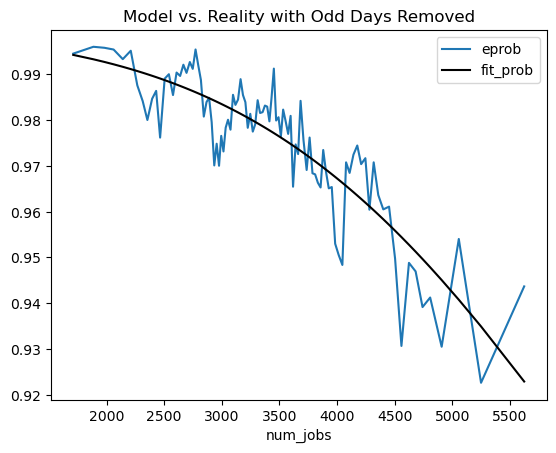

In [418]:
ax = test_run_jobs_summary.plot(x = 'num_jobs', y = 'eprob')
test_run_jobs_summary.plot(x = 'num_jobs', y = 'fit_prob',
                color = 'black', title='Model vs. Reality with Odd Days Removed',
                ax = ax);

In [ ]:
num_jobs_model = smf.logit('slurm_success ~ num_jobs + I(num_jobs**2)', data=run_jobs).fit()
num_jobs_model.summary()

Optimization terminated successfully.
         Current function value: 0.122835
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          slurm_success   No. Observations:               241022
Model:                          Logit   Df Residuals:                   241020
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01091
Time:                        12:26:23   Log-Likelihood:                -29606.
converged:                       True   LL-Null:                       -29932.
Covariance Type:            nonrobust   LLR p-value:                4.656e-144
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2188      0.029    146.374      0.000       4.162       4.275
I(num_jobs ** 2) -5.126e-08   1.95e-09    -26.329      0.000   -5.51e-08   -4.74e-08
====================================================================================
"""

In [400]:
num_jobs_model.aic

59215.79304269423

In [276]:
run_jobs['num_jobs'].describe()

count    535479.000000
mean       3159.981811
std        1066.372847
min           0.000000
25%        2610.000000
50%        3245.000000
75%        3861.000000
max        6390.000000
Name: num_jobs, dtype: float64

In [395]:
run_jobs_summary = (
    run_jobs
    .assign(group = pd.qcut(run_jobs['num_jobs'], 
                            q = 100, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['num_jobs', 'slurm_success']]
    .mean()
    .reset_index()
    .rename(columns = {'slurm_success': 'eprob'})
)
run_jobs_summary

,group,num_jobs,eprob
0,"(-0.001, 56.0]",9.744355,0.990842
1,"(56.0, 212.0]",171.865966,1.000000
2,"(212.0, 232.0]",224.331843,0.953971
3,"(232.0, 648.0]",428.605268,1.000000
4,"(648.0, 1212.0]",912.671650,1.000000
...,...,...,...
95,"(4731.0, 4804.0]",4766.847186,0.943755
96,"(4804.0, 4917.0]",4856.262533,0.926626
97,"(4917.0, 5094.0]",5001.457314,0.950797
98,"(5094.0, 5329.0]",5210.397278,0.929046


In [396]:
run_jobs_summary['fit_prob'] = num_jobs_model.predict(run_jobs_summary[['num_jobs']])
run_jobs_summary

,group,num_jobs,eprob,fit_prob
0,"(-0.001, 56.0]",9.744355,0.990842,0.968509
1,"(56.0, 212.0]",171.865966,1.000000,0.970756
2,"(212.0, 232.0]",224.331843,0.953971,0.971411
3,"(232.0, 648.0]",428.605268,1.000000,0.973666
4,"(648.0, 1212.0]",912.671650,1.000000,0.977466
...,...,...,...,...
95,"(4731.0, 4804.0]",4766.847186,0.943755,0.953029
96,"(4804.0, 4917.0]",4856.262533,0.926626,0.950247
97,"(4917.0, 5094.0]",5001.457314,0.950797,0.945180
98,"(5094.0, 5329.0]",5210.397278,0.929046,0.936497


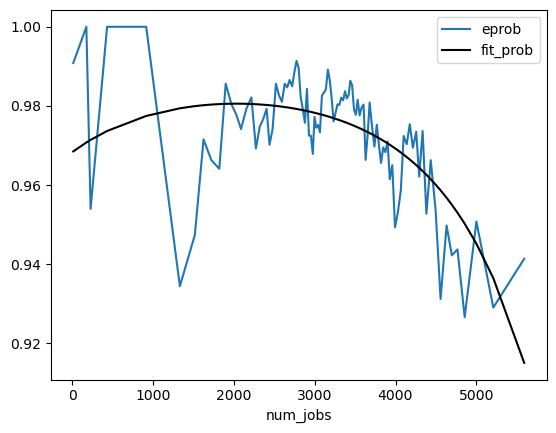

In [397]:
ax = run_jobs_summary.plot(x = 'num_jobs', y = 'eprob')
run_jobs_summary.plot(x = 'num_jobs', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [283]:
enter_num_jobs = 3159
pred = num_jobs_model.params['Intercept'] + num_jobs_model.params['num_jobs']*enter_num_jobs
print(processor.logistic(pred))

0.9747758488497059


In [274]:
run_jobs.set_index('time').corr()

,total_completed_jobs,slurm_success,num_jobs,jump_completed_jobs,jump_num_running_jobs,prev_min_completed_jobs,next_min_completed_jobs,prev_min_num_jobs,next_min_num_jobs
total_completed_jobs,1.000000,-0.024458,0.131197,0.363751,-0.129422,0.721893,0.721893,0.135389,0.121328
slurm_success,-0.024458,1.000000,-0.044979,0.002112,0.006300,-0.016792,-0.059626,-0.045169,-0.044730
num_jobs,0.131197,-0.044979,1.000000,0.009967,0.013590,0.121328,0.135389,0.999629,0.999629
jump_completed_jobs,0.363751,0.002112,0.009967,1.000000,0.238285,-0.382010,0.117209,0.001838,0.001092
jump_num_running_jobs,-0.129422,0.006300,0.013590,0.238285,1.000000,-0.306834,0.005181,-0.013663,0.022589
prev_min_completed_jobs,0.721893,-0.016792,0.121328,-0.382010,-0.306834,1.000000,0.633313,0.131197,0.117944
next_min_completed_jobs,0.721893,-0.059626,0.135389,0.117209,0.005181,0.633313,1.000000,0.135214,0.131197
prev_min_num_jobs,0.135389,-0.045169,0.999629,0.001838,-0.013663,0.131197,0.135214,1.000000,0.999012
next_min_num_jobs,0.121328,-0.044730,0.999629,0.001092,0.022589,0.117944,0.131197,0.999012,1.000000


In [254]:
top_models_df = pd.DataFrame(top_models)
top_models_df.head()

ValueError: If using all scalar values, you must pass an index

In [234]:
interact_logit_models = {}
interact_models_aic = {}
interact_top_models = {}
def combo_interact_pred_to_best_model(n=3):
    max_aic = 0
    for i in range(1, n+1):
        for combo in combinations(columns, i):
            combo = list(combo)
            # Implement some kind of check for highly correlated variables here?
            formula_params = ' * '.join(combo)
            formula = f'slurm_success ~ ' + formula_params
            model = smf.logit(formula, data=run_jobs).fit()
            logit_models[formula_params] = model
            print(f'Now showing summary for {formula_params}:')
            print(model.summary())
            print(f'{formula_params} AIC = {model.aic}')
            models_aic[formula_params] = model.aic
            if model.aic > max_aic:
                max_aic = model.aic
                max_aic_params = formula_params
            if model.aic > 50000:
                top_models[model.aic] = formula_params
    print(top_models)
    print(f'Max AIC of {max_aic} occured for model params {max_aic_params}')

combo_interact_pred_to_best_model(5)

Optimization terminated successfully.
         Current function value: 0.094866
         Iterations 8
Now showing summary for total_completed_jobs:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224976
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.002373
Time:                        20:33:45   Log-Likelihood:                -21343.
converged:                       True   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                 7.063e-24
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9989      0.017

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214156
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004300
Time:                        08:41:34   Log-Likelihood:                -19200.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 1.906e-32
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            4.1042      0.020    206.362     

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               241022
Model:                          Logit   Df Residuals:                   241014
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01265
Time:                        08:42:48   Log-Likelihood:                -29554.
converged:                      False   LL-Null:                       -29932.
Covariance Type:            nonrobust   LLR p-value:                3.104e-159
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4223      0.081     42.114      0.000       3.263       3.582
num_jobs         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214148
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.007159
Time:                        08:44:38   Log-Likelihood:                -19145.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 5.041e-50
                                                                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     4.8433

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224962
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01333
Time:                        08:45:08   Log-Likelihood:                -21108.
converged:                      False   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                7.390e-112
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 2.4318      0.114 

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214148
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.004564
Time:                        08:45:46   Log-Likelihood:                -19195.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 1.517e-29
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                 

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206019
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01570
Time:                        08:46:06   Log-Likelihood:                -17806.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                2.102e-111
                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                             

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214148
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.007032
Time:                        08:46:14   Log-Likelihood:                -19147.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 5.219e-49
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214148
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.007306
Time:                        08:46:21   Log-Likelihood:                -19142.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 3.423e-51
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214148
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01251
Time:                        08:47:30   Log-Likelihood:                -19042.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 2.930e-93
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                1.5896      0.126    

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224384
Model:                          Logit   Df Residuals:                   224368
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01382
Time:                        08:48:05   Log-Likelihood:                -25556.
converged:                      False   LL-Null:                       -25914.
Covariance Type:            nonrobust   LLR p-value:                5.660e-143
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    2.6151   

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               225129
Model:                          Logit   Df Residuals:                   225113
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02006
Time:                        08:48:17   Log-Likelihood:                -26494.
converged:                      False   LL-Null:                       -27037.
Covariance Type:            nonrobust   LLR p-value:                9.644e-222
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    2.8231   

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               241022
Model:                          Logit   Df Residuals:                   241006
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01289
Time:                        08:48:29   Log-Likelihood:                -29547.
converged:                      False   LL-Null:                       -29932.
Covariance Type:            nonrobust   LLR p-value:                9.999e-155
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              3.6052      0.107     33.60

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.007862
Time:                        08:50:02   Log-Likelihood:                -19131.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 1.972e-46
                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                               

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01899
Time:                        08:50:17   Log-Likelihood:                -18917.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                4.296e-134
                                                                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                           

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206003
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02180
Time:                        08:50:32   Log-Likelihood:                -17695.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                6.879e-146
                                                                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                           

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02097
Time:                        08:50:41   Log-Likelihood:                -18879.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                4.496e-150
                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                       

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02158
Time:                        08:50:50   Log-Likelihood:                -18867.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                5.173e-155
                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                       

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01999
Time:                        08:51:20   Log-Likelihood:                -18898.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                3.643e-142
                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                   

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214517
Model:                          Logit   Df Residuals:                   214485
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02896
Time:                        08:51:35   Log-Likelihood:                -19361.
converged:                      False   LL-Null:                       -19938.
Covariance Type:            nonrobust   LLR p-value:                5.786e-223
                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                   

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224946
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01451
Time:                        08:51:51   Log-Likelihood:                -21083.
converged:                      False   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                6.709e-111
                                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                               

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206003
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01818
Time:                        08:52:21   Log-Likelihood:                -17761.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.389e-118
                                                                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept 

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.007929
Time:                        08:52:31   Log-Likelihood:                -19130.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 6.153e-47
                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept             

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.008023
Time:                        08:52:41   Log-Likelihood:                -19128.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 1.194e-47
                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept             

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206003
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02165
Time:                        08:53:05   Log-Likelihood:                -17698.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                1.051e-144
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206003
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02182
Time:                        08:53:14   Log-Likelihood:                -17695.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                5.538e-146
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02170
Time:                        08:53:23   Log-Likelihood:                -18865.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                6.193e-156
                                                                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                     

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01875
Time:                        08:54:09   Log-Likelihood:                -18922.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                3.922e-132
                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                     

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               206035
Model:                          Logit   Df Residuals:                   206003
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02775
Time:                        08:54:24   Log-Likelihood:                -17588.
converged:                      False   LL-Null:                       -18090.
Covariance Type:            nonrobust   LLR p-value:                4.334e-191
                                                                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                     

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               214164
Model:                          Logit   Df Residuals:                   214132
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01385
Time:                        08:54:38   Log-Likelihood:                -19016.
converged:                      False   LL-Null:                       -19283.
Covariance Type:            nonrobust   LLR p-value:                 4.578e-93
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                 

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               213987
Model:                          Logit   Df Residuals:                   213955
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02790
Time:                        08:55:09   Log-Likelihood:                -23170.
converged:                      False   LL-Null:                       -23835.
Covariance Type:            nonrobust   LLR p-value:                4.322e-260
                                                                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                             

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224384
Model:                          Logit   Df Residuals:                   224352
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.01452
Time:                        08:55:24   Log-Likelihood:                -25538.
converged:                      False   LL-Null:                       -25914.
Covariance Type:            nonrobust   LLR p-value:                2.543e-138
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               225129
Model:                          Logit   Df Residuals:                   225097
Method:                           MLE   Df Model:                           31
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02071
Time:                        08:55:34   Log-Likelihood:                -26476.
converged:                      False   LL-Null:                       -27037.
Covariance Type:            nonrobust   LLR p-value:                1.298e-215
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                         

In [237]:
#to_csv_data
run_jobs.to_csv('../data/run_jobs.csv')

In [221]:
print(models_aic)

{'total_completed_jobs': 42689.36811823133}


In [201]:
model = smf.logit('slurm_success ~ num_jobs', data=run_jobs).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.123138
         Iterations 8


Intercept    4.644651
num_jobs    -0.000313
dtype: float64

In [388]:
def identify_slurm_periods_run_jobs(begin=None, end=None):
        """
        Identifies periods of success and failure in SLURM jobs.

        Args:
            begin (str, optional): Start date in ISO format (e.g., 'YYYY-MM-DD'). Defaults to None.
            end (str, optional): End date in ISO format (e.g., 'YYYY-MM-DD'). Defaults to None.

        Returns:
            tuple: Two lists of tuples representing success and failure periods. Each tuple contains the start and end datetime.
        """
        if begin and end:
            filtered_servers = run_jobs[run_jobs['time'].between(begin, end)]
        else:
            filtered_servers = run_jobs

        filtered_servers = filtered_servers.sort_values('time').reset_index(drop=True)
        slurm_successes = []
        slurm_failures = []

        current_status = None
        start_time = None

        for _, row in filtered_servers.iterrows():
            status = row['slurm_success']
            time = row['time']

            if current_status is None:
                current_status = status
                start_time = time
            elif status != current_status:
                if current_status == 1:
                    slurm_successes.append((start_time, time))
                else:
                    slurm_failures.append((start_time, time))
                current_status = status
                start_time = time

        if start_time is not None:
            if current_status == 1:
                slurm_successes.append((start_time, filtered_servers['time'].iloc[-1]))
            else:
                slurm_failures.append((start_time, filtered_servers['time'].iloc[-1]))

        return slurm_successes, slurm_failures

def plot_jobs_and_servers_with_slurm_periods_run_jobs(begin_date, end_date, rolling=0):
        """
        Plots total completed jobs and SLURM periods of success and failure.

        Args:
            rolling (int, optional): Size of the rolling average window. Defaults to 0 (no rolling average).
            begin_date (str): Start date for the plot in ISO format (e.g., 'YYYY-MM-DD'). This parameter is required.
            end_date (str): End date for the plot in ISO format (e.g., 'YYYY-MM-DD'). This parameter is required.

        Returns:
            None

        Raises:
            ValueError: If `begin_date` or `end_date` is not provided or is invalid.
        """
        if not begin_date or not end_date:
            raise ValueError("Both 'begin_date' and 'end_date' must be provided and valid.")
        
        jobs_grouped = processor.jobs_grouped
        jobs_filtered = jobs_grouped[jobs_grouped['end_dt_min_start'].between(begin_date, end_date)]
        success_regions, failure_regions = identify_slurm_periods_run_jobs(begin=begin_date, end=end_date)

        x = jobs_filtered['end_dt_min_start']
        y = jobs_filtered['total_completed_jobs']

        plt.figure(figsize=(12, 8))
        plt.plot(x, y, color='red', alpha=0.7, label='Total Completed Jobs')

        for start, end in success_regions:
            plt.axvspan(start, end, color='green', alpha=0.3)

        for start, end in failure_regions:
            plt.axvspan(start, end, color='red', alpha=0.3)

        handles = [
            plt.Line2D([0], [0], color='green', lw=4, alpha=0.3, label='Slurm Success Period'),
            plt.Line2D([0], [0], color='red', lw=4, alpha=0.3, label='Slurm Failure Period'),
            plt.Line2D([0], [0], color='red', label='Total Completed Jobs')
        ]

        if rolling > 0:
            plt.plot(x, y.rolling(rolling).mean(), color='black', alpha=.7, label='Rolling Average')
            handles.append(plt.Line2D([0], [0], color='black', label=f'Total Completed Jobs (Rolling {rolling} min Average)'))

        plt.legend(handles=handles, loc='upper left')
        plt.title(f'All User Errors Total Jobs Completed and Slurm Periods ({begin_date} to {end_date})', fontsize=14)
        plt.xlabel('Datetime', fontsize=12)
        plt.ylabel('Jobs Completed', fontsize=12)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

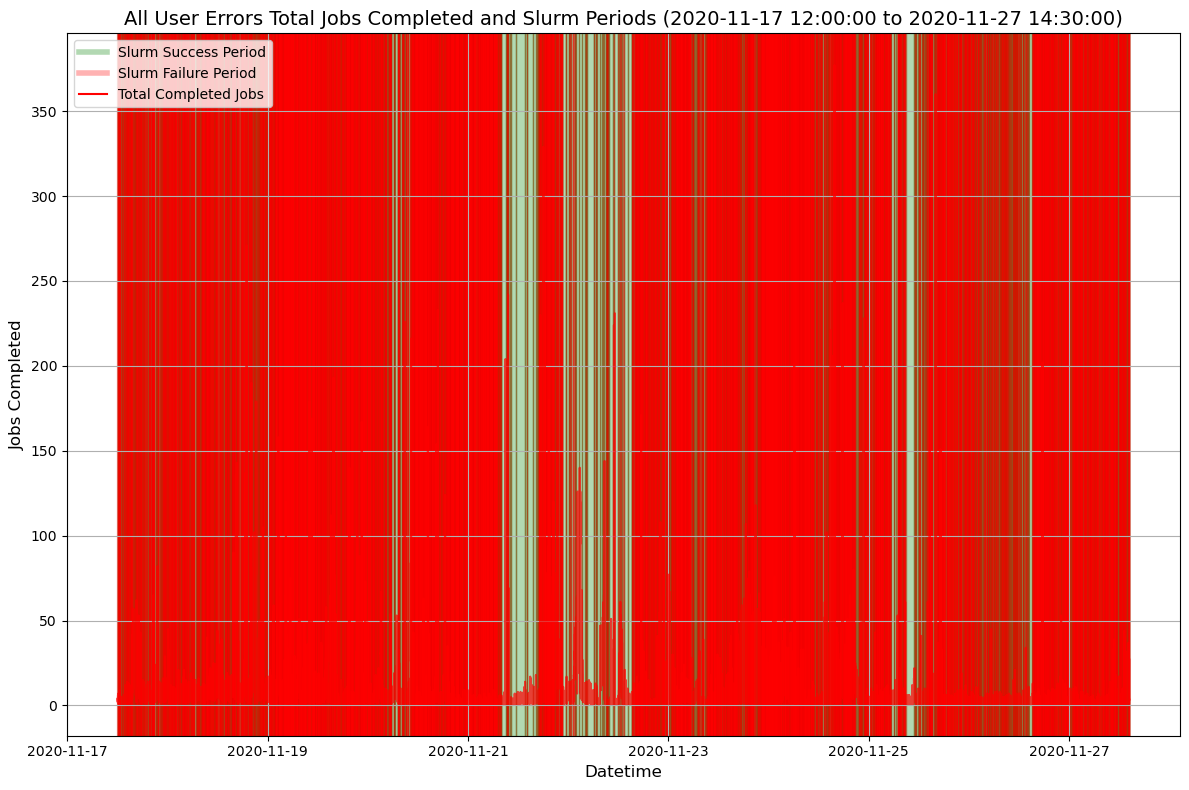

In [392]:
plot_jobs_and_servers_with_slurm_periods_run_jobs(begin_date='2020-11-17 12:00:00', end_date='2020-11-27 14:30:00')

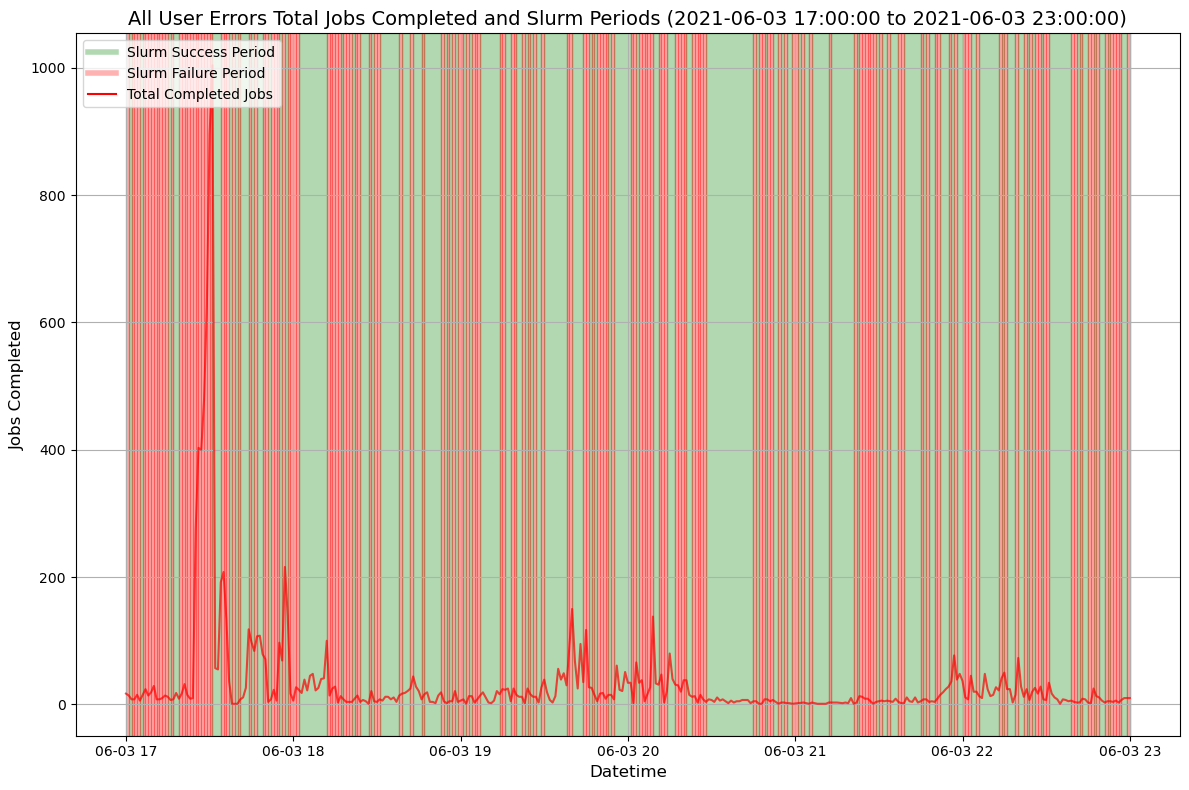

In [390]:
plot_jobs_and_servers_with_slurm_periods_run_jobs(begin_date='2021-06-03 17:00:00', end_date='2021-06-03 23:00:00')

In [204]:
    logit_models = {}
    models_aic = {}
    max_aic = 0
    for combo in combinations(columns, 1):
        combo = list(combo)
        print(combo)
        formula_params = ' + '.join(combo)
        print(formula_params)
        formula = f'slurm_success ~ ' + formula_params
        model = smf.logit(formula, data=run_jobs).fit()
        print(model.params)
        logit_models[formula_params] = model
        print(f'Now showing summary for {formula_params}:')
        print(model.summary())
        print(f'{formula_params} AIC = {model.aic}')
        models_aic[formula_params] = model.aic
        if model.aic > max_aic:
            max_aic = model.aic
            max_aic_params = formula_params
    print(f'Max AIC of {max_aic} occured for model params {formula_params}')

['total_completed_jobs']
total_completed_jobs
Optimization terminated successfully.
         Current function value: 0.094866
         Iterations 8
Intercept               3.998937
total_completed_jobs   -0.003827
dtype: float64
Now showing summary for total_completed_jobs:
                           Logit Regression Results                           
Dep. Variable:          slurm_success   No. Observations:               224978
Model:                          Logit   Df Residuals:                   224976
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                0.002373
Time:                        19:49:04   Log-Likelihood:                -21343.
converged:                       True   LL-Null:                       -21393.
Covariance Type:            nonrobust   LLR p-value:                 7.063e-24
                           coef    std err          z      P>|z|      [0.025      0.975]
----

c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


         Current function value: 0.000000
         Iterations: 35


c:\Users\irela\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


LinAlgError: Singular matrix